In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [32]:
data1 = pd.read_csv('/work/Daily_Cuaca_Kebumen.csv')

/tmp/ipykernel_3807/1856311698.py:1: DtypeWarning: Columns (26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv('/work/Daily_Cuaca_Kebumen.csv')


In [34]:
data2 = pd.read_csv('/work/Kebumen 2023-01-01 to 2024-12-31.csv')

In [36]:
data1.tail(10)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
16380,"Kebumen, Indonesia",2022-12-22,32.1,25.1,26.9,39.3,25.1,28.6,23.4,82.0,...,13.5,5.0,30.0,1671686556,1671731809,0.96,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"96805099999,remote"
16381,"Kebumen, Indonesia",2022-12-23,31.6,23.7,25.9,38.4,23.7,26.9,22.9,83.9,...,10.0,7.0,10.0,1671772986,1671818239,0.00,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"96805099999,remote"
16382,"Kebumen, Indonesia",2022-12-24,28.9,24.1,26.0,33.5,24.1,27.0,22.6,81.9,...,10.0,6.0,10.0,1671859417,1671904668,0.03,"Rain, Overcast",Cloudy skies throughout the day with early mor...,rain,"96805099999,remote"
16383,"Kebumen, Indonesia",2022-12-25,28.7,24.5,25.9,33.8,24.5,26.8,22.8,83.6,...,7.3,5.0,10.0,1671945847,1671991097,0.06,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"96805099999,remote"
16384,"Kebumen, Indonesia",2022-12-26,30.2,23.4,26.0,35.9,23.4,27.0,22.9,83.3,...,23.3,9.0,30.0,1672032278,1672077525,0.10,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"96805099999,remote"
16385,"Kebumen, Indonesia",2022-12-27,30.1,23.8,26.2,35.2,23.8,27.5,22.9,82.3,...,20.2,8.0,10.0,1672118709,1672163953,0.13,"Rain, Overcast",Cloudy skies throughout the day with rain in t...,rain,"96805099999,remote"
16386,"Kebumen, Indonesia",2022-12-28,29.6,24.0,26.6,35.9,24.0,27.9,23.2,82.0,...,25.6,10.0,30.0,1672205140,1672250380,0.16,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"96805099999,remote"
16387,"Kebumen, Indonesia",2022-12-29,32.1,24.2,26.5,38.4,24.2,27.8,23.1,82.1,...,16.4,9.0,30.0,1672291571,1672336807,0.20,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"96805099999,remote"
16388,"Kebumen, Indonesia",2022-12-30,30.9,23.9,26.8,35.6,23.9,28.4,22.6,78.4,...,20.2,10.0,30.0,1672378003,1672423234,0.25,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"96805099999,remote"
16389,"Kebumen, Indonesia",2022-12-31,31.1,24.1,26.8,36.2,24.1,28.2,22.8,79.2,...,20.6,9.0,30.0,1672464434,1672509660,0.27,"Rain, Overcast",Cloudy skies throughout the day with afternoon...,rain,"96805099999,remote"


In [38]:
data2.tail(10)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
721,Kebumen,2024-12-22,32.7,25.9,28.0,41.1,25.9,30.6,24.8,83.5,...,18.4,8,30,2024-12-22T05:22:53,2024-12-22T17:57:05,0.72,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,96805099999
722,Kebumen,2024-12-23,32.7,25.1,27.8,40.3,25.1,30.8,24.7,84.1,...,18.6,9,30,2024-12-23T05:23:23,2024-12-23T17:57:35,0.75,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,96805099999
723,Kebumen,2024-12-24,31.1,25.1,26.8,38.0,25.1,28.7,24.7,88.9,...,7.7,4,30,2024-12-24T05:23:53,2024-12-24T17:58:04,0.78,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,96805099999
724,Kebumen,2024-12-25,32.4,25.1,27.7,39.9,25.1,30.5,24.7,84.6,...,14.5,8,10,2024-12-25T05:24:24,2024-12-25T17:58:32,0.82,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,96805099999
725,Kebumen,2024-12-26,29.4,25.1,26.8,35.3,25.1,28.8,24.4,86.9,...,12.7,7,30,2024-12-26T05:24:55,2024-12-26T17:59:00,0.85,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,96805099999
726,Kebumen,2024-12-27,32.7,25.1,28.5,39.5,25.1,32.2,24.9,81.7,...,15.6,6,10,2024-12-27T05:25:26,2024-12-27T17:59:28,0.88,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,96805099999
727,Kebumen,2024-12-28,27.8,25.4,26.6,32.5,25.4,28.4,23.6,83.9,...,8.1,6,30,2024-12-28T05:25:57,2024-12-28T17:59:55,0.91,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"96805099999,remote"
728,Kebumen,2024-12-29,26.2,25.0,25.5,26.2,25.0,25.5,22.5,83.7,...,3.4,2,10,2024-12-29T05:26:28,2024-12-29T18:00:22,0.94,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,remote
729,Kebumen,2024-12-30,29.6,24.5,26.7,33.6,24.5,28.2,22.6,78.3,...,25.8,10,10,2024-12-30T05:27:00,2024-12-30T18:00:48,0.98,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,remote
730,Kebumen,2024-12-31,28.4,24.0,26.1,31.7,24.0,27.0,23.0,83.5,...,10.9,6,10,2024-12-31T05:27:31,2024-12-31T18:01:14,0.00,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,remote


In [94]:
data3 = pd.concat([data1, data2], ignore_index=True)

data3

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Kebumen, Indonesia",1978-02-16,32.1,25.1,28.1,39.3,25.1,31.4,24.8,83.5,...,NaN,NaN,NaN,1978-02-16T05:45:06,1978-02-16T18:05:40,0.28,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,96805099999
1,"Kebumen, Indonesia",1978-02-17,31.1,25.1,27.9,37.9,25.1,31.8,24.9,84.4,...,NaN,NaN,NaN,1978-02-17T05:45:14,1978-02-17T18:05:24,0.31,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,96805099999
2,"Kebumen, Indonesia",1978-02-18,32.1,26.1,29.0,40.8,26.1,33.6,25.5,82.7,...,NaN,NaN,NaN,1978-02-18T05:45:22,1978-02-18T18:05:08,0.34,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,96805099999
3,"Kebumen, Indonesia",1978-02-19,33.1,25.1,28.5,39.4,25.1,32.2,25.1,83.2,...,NaN,NaN,NaN,1978-02-19T05:45:29,1978-02-19T18:04:50,0.38,Overcast,Cloudy skies throughout the day.,cloudy,96805099999
4,"Kebumen, Indonesia",1978-02-20,31.1,24.1,27.1,44.4,24.1,30.7,23.1,85.2,...,NaN,NaN,NaN,1978-02-20T05:45:35,1978-02-20T18:04:32,0.41,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,96805099999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17116,Kebumen,2024-12-27,32.7,25.1,28.5,39.5,25.1,32.2,24.9,81.7,...,15.6,6.0,10.0,2024-12-27T05:25:26,2024-12-27T17:59:28,0.88,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,96805099999
17117,Kebumen,2024-12-28,27.8,25.4,26.6,32.5,25.4,28.4,23.6,83.9,...,8.1,6.0,30.0,2024-12-28T05:25:57,2024-12-28T17:59:55,0.91,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"96805099999,remote"
17118,Kebumen,2024-12-29,26.2,25.0,25.5,26.2,25.0,25.5,22.5,83.7,...,3.4,2.0,10.0,2024-12-29T05:26:28,2024-12-29T18:00:22,0.94,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,remote
17119,Kebumen,2024-12-30,29.6,24.5,26.7,33.6,24.5,28.2,22.6,78.3,...,25.8,10.0,10.0,2024-12-30T05:27:00,2024-12-30T18:00:48,0.98,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,remote


In [96]:
data3.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,16700.000000,16700.000000,16700.000000,16700.000000,16700.000000,16700.000000,16700.000000,16700.000000,16700.000000,16700.000000,...,17121.000000,16407.000000,13093.000000,16700.000000,16695.000000,5479.000000,5479.000000,5479.000000,1087.000000,17121.000000
mean,29.977749,24.762790,27.084455,35.016114,24.911084,29.429234,23.694479,82.315126,8.965808,58.053892,...,16.651434,159.296587,1011.163080,72.508671,10.647553,216.319566,18.674119,7.532031,19.770009,0.483781
std,1.716596,1.344498,1.219990,3.475373,1.842660,2.545827,1.098086,4.442787,21.330792,49.348563,...,8.037371,63.588276,1.869502,16.539230,2.547669,59.172609,5.113399,1.896949,11.830311,0.288673
min,21.900000,2.600000,20.400000,21.900000,-0.900000,19.800000,8.400000,46.000000,0.000000,0.000000,...,0.000000,0.000000,962.100000,0.000000,1.000000,10.000000,1.000000,1.000000,10.000000,0.000000
25%,28.900000,24.100000,26.300000,32.800000,24.100000,27.600000,23.100000,79.700000,0.000000,0.000000,...,11.200000,117.500000,1010.000000,61.700000,9.000000,176.550000,15.200000,6.000000,10.000000,0.250000
50%,30.100000,24.900000,27.200000,35.400000,24.900000,29.500000,23.900000,82.500000,0.700000,100.000000,...,15.500000,130.100000,1011.200000,75.000000,10.200000,226.900000,19.600000,8.000000,10.000000,0.500000
75%,31.200000,25.400000,27.900000,37.400000,25.400000,31.200000,24.500000,85.000000,7.300000,100.000000,...,22.300000,200.000000,1012.400000,85.000000,11.600000,260.300000,22.500000,9.000000,30.000000,0.750000
max,55.700000,33.700000,36.000000,55.700000,41.700000,41.700000,26.500000,98.800000,356.800000,100.000000,...,133.600000,360.000000,1024.100000,100.000000,37.000000,354.900000,30.900000,10.000000,75.000000,0.980000


In [98]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17121 entries, 0 to 17120
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              17121 non-null  object 
 1   datetime          17121 non-null  object 
 2   tempmax           16700 non-null  float64
 3   tempmin           16700 non-null  float64
 4   temp              16700 non-null  float64
 5   feelslikemax      16700 non-null  float64
 6   feelslikemin      16700 non-null  float64
 7   feelslike         16700 non-null  float64
 8   dew               16700 non-null  float64
 9   humidity          16700 non-null  float64
 10  precip            16700 non-null  float64
 11  precipprob        16700 non-null  float64
 12  precipcover       17121 non-null  float64
 13  preciptype        9765 non-null   object 
 14  snow              9089 non-null   float64
 15  snowdepth         9089 non-null   float64
 16  windgust          1087 non-null   float6

In [100]:
# Mengonversi nilai precipprob: 0 menjadi "No", 100 menjadi "Yes"
data3['precipprob'] = data3['precipprob'].apply(lambda x: "Yes" if x == 100 else "No")

# Mengonversi ke tipe data boolean
data3['precipprob'] = data3['precipprob'].map({"Yes": True, "No": False})

# Mengecek hasil
print(data3['precipprob'].head())

0    False
1    False
2    False
3    False
4    False
Name: precipprob, dtype: bool


In [48]:
# Export DataFrame ke csv
data3.to_csv(
    'datalstm.csv', 
    sep=',',
    index=False,
    index_label='datetime'
)


In [102]:
data3

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Kebumen, Indonesia",1978-02-16,32.1,25.1,28.1,39.3,25.1,31.4,24.8,83.5,...,NaN,NaN,NaN,1978-02-16T05:45:06,1978-02-16T18:05:40,0.28,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,96805099999
1,"Kebumen, Indonesia",1978-02-17,31.1,25.1,27.9,37.9,25.1,31.8,24.9,84.4,...,NaN,NaN,NaN,1978-02-17T05:45:14,1978-02-17T18:05:24,0.31,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,96805099999
2,"Kebumen, Indonesia",1978-02-18,32.1,26.1,29.0,40.8,26.1,33.6,25.5,82.7,...,NaN,NaN,NaN,1978-02-18T05:45:22,1978-02-18T18:05:08,0.34,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,96805099999
3,"Kebumen, Indonesia",1978-02-19,33.1,25.1,28.5,39.4,25.1,32.2,25.1,83.2,...,NaN,NaN,NaN,1978-02-19T05:45:29,1978-02-19T18:04:50,0.38,Overcast,Cloudy skies throughout the day.,cloudy,96805099999
4,"Kebumen, Indonesia",1978-02-20,31.1,24.1,27.1,44.4,24.1,30.7,23.1,85.2,...,NaN,NaN,NaN,1978-02-20T05:45:35,1978-02-20T18:04:32,0.41,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,96805099999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17116,Kebumen,2024-12-27,32.7,25.1,28.5,39.5,25.1,32.2,24.9,81.7,...,15.6,6.0,10.0,2024-12-27T05:25:26,2024-12-27T17:59:28,0.88,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,96805099999
17117,Kebumen,2024-12-28,27.8,25.4,26.6,32.5,25.4,28.4,23.6,83.9,...,8.1,6.0,30.0,2024-12-28T05:25:57,2024-12-28T17:59:55,0.91,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"96805099999,remote"
17118,Kebumen,2024-12-29,26.2,25.0,25.5,26.2,25.0,25.5,22.5,83.7,...,3.4,2.0,10.0,2024-12-29T05:26:28,2024-12-29T18:00:22,0.94,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,remote
17119,Kebumen,2024-12-30,29.6,24.5,26.7,33.6,24.5,28.2,22.6,78.3,...,25.8,10.0,10.0,2024-12-30T05:27:00,2024-12-30T18:00:48,0.98,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,remote


In [104]:
data3['datetime'] = pd.to_datetime(data3['datetime'])

In [106]:
data3.isnull().sum()

name                    0
datetime                0
tempmax               421
tempmin               421
temp                  421
feelslikemax          421
feelslikemin          421
feelslike             421
dew                   421
humidity              421
precip                421
precipprob              0
precipcover             0
preciptype           7356
snow                 8032
snowdepth            8032
windgust            16034
windspeed               0
winddir               714
sealevelpressure     4028
cloudcover            421
visibility            426
solarradiation      11642
solarenergy         11642
uvindex             11642
severerisk          16034
sunrise                 0
sunset                  0
moonphase               0
conditions            421
description           421
icon                  421
stations              421
dtype: int64

In [78]:
data3.drop(
    columns=[
        'stations',
        'sunrise',
        'sunset',
        'moonphase',
        'conditions',
        'description',
        'icon',
        'name',
        ], 
    inplace=True
    )

In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Memilih kolom yang digunakan
selected_columns = [
    'tempmax', 
    'tempmin', 
    'temp',   
    'humidity', 
    'precip', 
    'windspeed',
    'winddir',
    'sealevelpressure',
    'precipprob'
]
data3 = data3[selected_columns]

# Memisahkan data dengan dan tanpa nilai missing pada sealevelpressure
complete_data = data3.dropna(subset=['sealevelpressure'])
missing_data = data3[data3['sealevelpressure'].isna()]

# Memisahkan fitur dan target untuk pelatihan model
X = complete_data.drop(columns=['sealevelpressure'])
y = complete_data['sealevelpressure']

# Menangani missing values pada fitur dengan SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Membagi data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Membuat dan melatih model Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

# Mengisi nilai missing pada sealevelpressure
X_missing = missing_data.drop(columns=['sealevelpressure'])
X_missing_imputed = imputer.transform(X_missing)
missing_data['sealevelpressure'] = model.predict(X_missing_imputed)

# Menggabungkan kembali data yang lengkap dengan data yang diisi
final_data = pd.concat([complete_data, missing_data]).sort_index()

RMSE: 1.4757103750083111
/tmp/ipykernel_3807/322848899.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data['sealevelpressure'] = model.predict(X_missing_imputed)


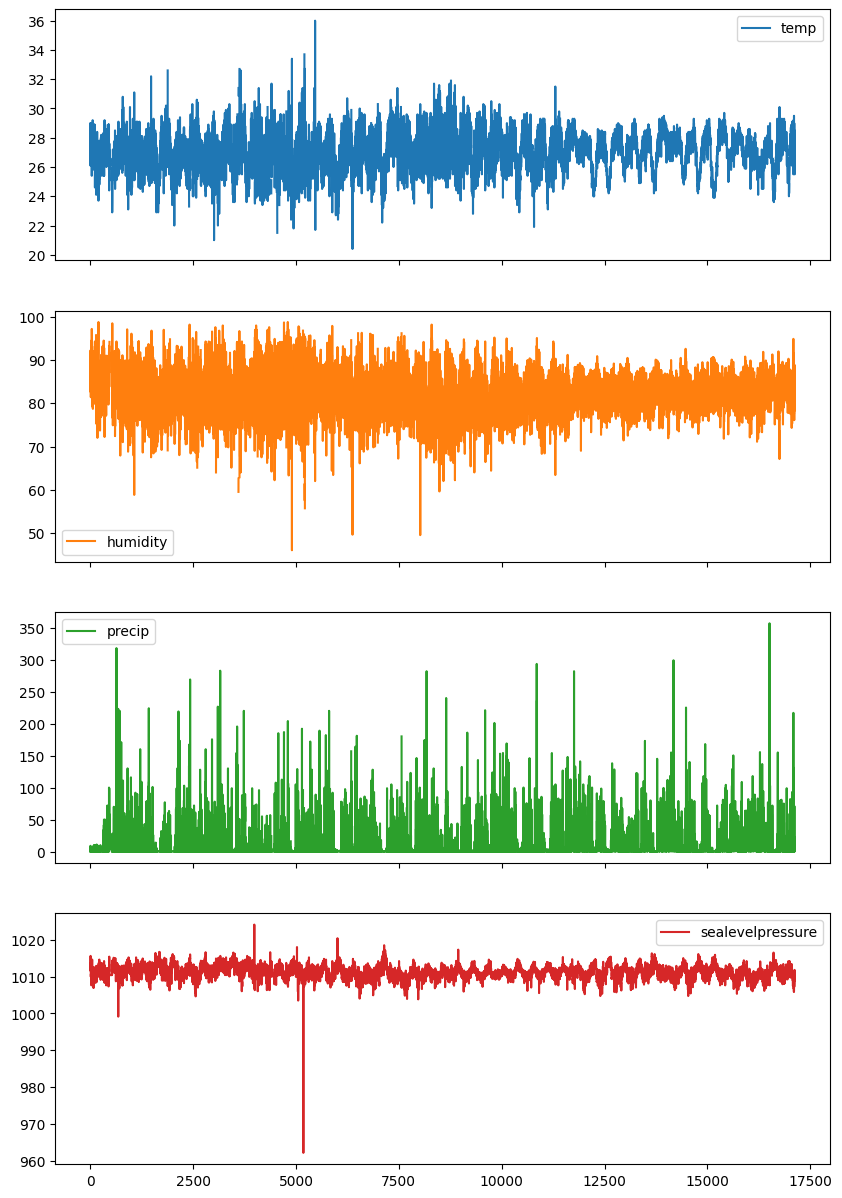

In [110]:
final_data.plot(
    y=['temp', 'humidity','precip','sealevelpressure'], 
    subplots=True, figsize=(10, 15))
plt.show()

In [112]:
final_data.isna().sum()

tempmax             421
tempmin             421
temp                421
humidity            421
precip              421
windspeed             0
winddir             714
sealevelpressure      0
dtype: int64

In [114]:
# Membagi variabel independen dan target
X = data3[[
    'temp', 
    'tempmax',
    'tempmin',
    'humidity',
    'sealevelpressure', 
    'windspeed',
    'winddir'
    ]]  # Variabel independen
y = data3['precipprob']  # Target (Curah Hujan)

KeyError: 'precipprob'

In [16]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Standarisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Daftar model klasifikasi
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=50),
    'Random Forest': RandomForestClassifier(random_state=50),
    'Gradient Boosting': GradientBoostingClassifier(random_state=50),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Evaluasi semua model dan menyimpan hasil dalam bentuk tabel
results = []
for name, model in models.items():
    # Melatih model
    model.fit(X_train_scaled, y_train)
    
    # Prediksi
    y_pred = model.predict(X_test_scaled)
    
    # Evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision (macro avg)': report['macro avg']['precision'],
        'Recall (macro avg)': report['macro avg']['recall'],
        'F1-Score (macro avg)': report['macro avg']['f1-score']
    })

# Menampilkan hasil dalam bentuk tabel
results_df = pd.DataFrame(results)
print(results_df)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=200afad5-8991-4e20-8a55-8751c7aff3b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>